In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random

In [13]:
# Define your paths
train_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/train'
valid_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/valid'
test_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/test'

In [14]:
# Generate train batches
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(244,244), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(244,244), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(244,244), batch_size=10, shuffle=False)

Found 2469 images belonging to 2 classes.
Found 235 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [15]:
# MODEL
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(244, 244, 3)),
    MaxPooling2D((2, 2)),
          
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [17]:
# Fit the model using the train_batches and validation data
model.fit(train_batches, epochs=5, batch_size=10, validation_data=valid_batches)

Epoch 1/5
247/247 [==============================] - 82s 328ms/step - loss: 16.4905 - accuracy: 0.5000 - val_loss: 0.7160 - val_accuracy: 0.5000
Epoch 2/5
247/247 [==============================] - 79s 320ms/step - loss: 0.6995 - accuracy: 0.5000 - val_loss: 0.7055 - val_accuracy: 0.5000
Epoch 3/5
247/247 [==============================] - 85s 344ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 4/5
247/247 [==============================] - 86s 347ms/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 5/5
247/247 [==============================] - 84s 340ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.7003 - val_accuracy: 0.5000


In [18]:
# Fit the model using the train_batches directly
hist = model.fit(train_batches, epochs=5, batch_size=10, validation_data=valid_batches)

Epoch 1/5
247/247 [==============================] - 84s 339ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 2/5
247/247 [==============================] - 83s 334ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 3/5
247/247 [==============================] - 81s 329ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 4/5
247/247 [==============================] - 81s 328ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 5/5
247/247 [==============================] - 89s 360ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6975 - val_accuracy: 0.5000


In [19]:
# Evaluate the model
model.evaluate(train_batches)


247/247 [==============================] - 40s 163ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934127807617188, 0.5]

In [35]:
# Making Predictions
batch = next(train_batches)  # Get the next batch
idx_in_batch = random.randint(0, len(batch[0]) - 1)  # Randomly select an image index within the batch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


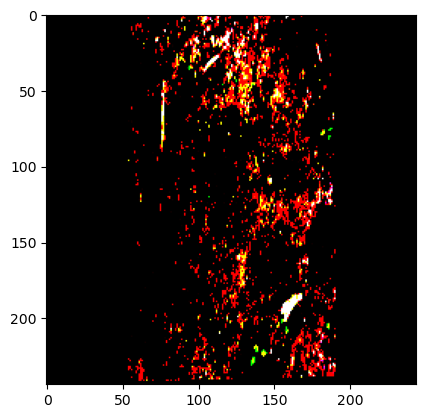

In [21]:
# Display a random image from the batch
plt.imshow(batch[0][idx_in_batch])
plt.show()

In [9]:
# Reshape the image for prediction
image_for_prediction = batch[0][idx_in_batch].reshape(1, 244, 244, 3)
train_batches_pred = model.predict(image_for_prediction)


1/1 [==============================] - 0s 429ms/step


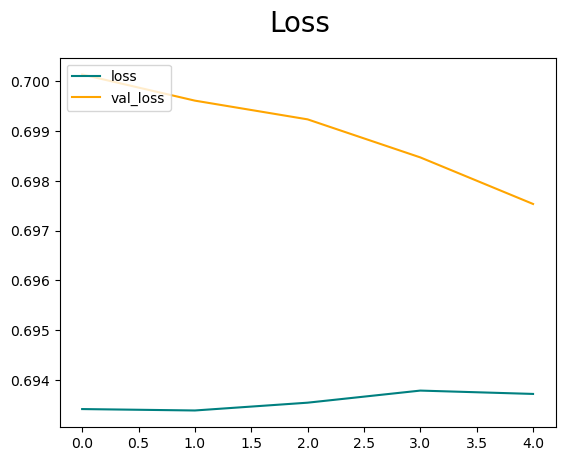

In [36]:
# Plotting Loss and Validation Loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')  # Fix the syntax here
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

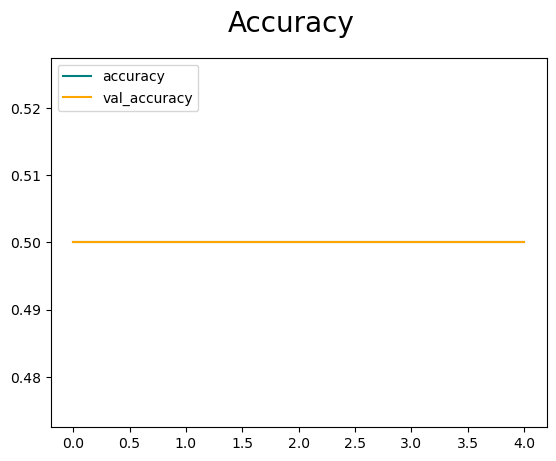

In [23]:
# Plotting Loss and Validation Loss
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')  # Fix the syntax here
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
# Metrics Calculation
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test_batches:
    X, y = batch
    y_binary = y[:, 0]  # Use the first column to get binary labels for binary classification
    yhat = model.predict(X)
    
    # Update metrics
    pre.update_state(y_binary, yhat)
    re.update_state(y_binary, yhat)
    acc.update_state(y_binary, yhat)

# Calculate metrics after all batches
precision_result = pre.result().numpy()
recall_result = re.result().numpy()
accuracy_result = acc.result().numpy()

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 2s 2s/step


KeyboardInterrupt: 

In [47]:
print(f'Precision: {precision_result}, Recall: {recall_result}, Accuracy: {accuracy_result}')

Precision: 0.0, Recall: 0.0, Accuracy: 0.5678105354309082


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


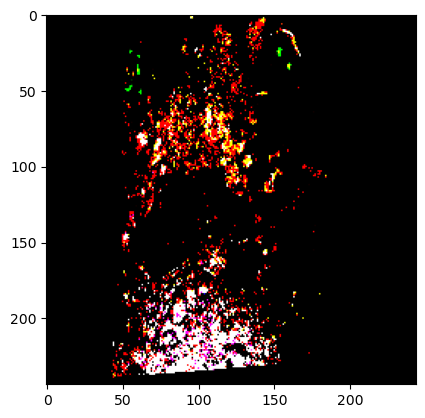

1/1 [==============================] - 0s 70ms/step
Predictions: [[0.4917224]]
Our model says it is a: crop


In [26]:
# Making Predictions
batch = next(train_batches)  # Get the next batch
idx_in_batch = random.randint(0, len(batch[0]) - 1)  # Randomly select an image index within the batch

# Display a random image from the batch
plt.imshow(batch[0][idx_in_batch])
plt.show()

# Reshape the image for prediction
image_for_prediction = batch[0][idx_in_batch].reshape(1, 244, 244, 3)
train_batches_pred = model.predict(image_for_prediction)

# Print the predictions
print("Predictions:", train_batches_pred)

train_batches_pred = train_batches_pred > 0.5

if(train_batches_pred == 0):
    pred = 'crop'
else:
    pred = 'weed'
    
print("Our model says it is a:", pred)




In [44]:
from tensorflow.keras.models import load_model
import os


In [46]:
model.save(os.path.join('models','weedcropcnn'))

INFO:tensorflow:Assets written to: models\weedcropcnn\assets


INFO:tensorflow:Assets written to: models\weedcropcnn\assets


In [47]:
new_model = load_model(os.path.join('models', 'weedcropcnn'))

In [48]:
!pip install joblib


In [49]:
import joblib
import os

# ...

# Save the model as a pickle file
joblib.dump(model, os.path.join('models', 'weedcropcnn.pkl'))

# ...


['models\\weedcropcnn.pkl']